In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Baseline MLP Material Classification Experiment on Anchor Block Data

In [3]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/anblock-error-dataset.csv"
df = pd.read_csv(PATH)

In [4]:
# drop uncomplete rows
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdoa12            59535 non-null  float64
 1   tdoa21            59535 non-null  float64
 2   snr_an1           59535 non-null  float64
 3   power_dif_an1     59535 non-null  float64
 4   snr_an2           59535 non-null  float64
 5   power_dif_an2     59535 non-null  float64
 6   an1_rx_snr        59535 non-null  float64
 7   an1_rx_powerdif   59535 non-null  float64
 8   an1_tof           59535 non-null  float64
 9   an2_rx_snr        59535 non-null  float64
 10  an2_rx_powerdif   59535 non-null  float64
 11  an2_tof           59535 non-null  float64
 12  material          59535 non-null  object 
 13  encoded_material  59535 non-null  int64  
 14  err_an1           59535 non-null  float64
 15  err_an2           59535 non-null  float64
dtypes: float64(14), int64(1), object(1)
memo

In [6]:
# show different label types
df.encoded_material.unique()

array([1, 2, 3, 4, 5, 6])

In [7]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

<Axes: xlabel='encoded_material', ylabel='count'>

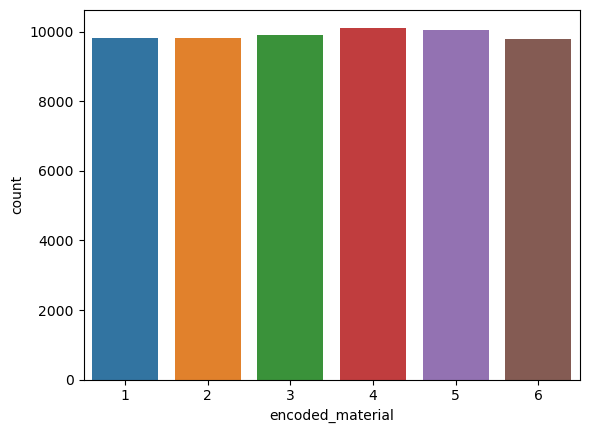

In [8]:
# plot class imbalance
sns.countplot(x=df['encoded_material'])

In [9]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [10]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                        )

In [11]:
train_df = df.drop('material', axis=1)

In [12]:
# Extracted features 
X = train_df.drop('encoded_material', axis=1)
y = train_df['encoded_material'] # Labels

In [13]:
# Feature Scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

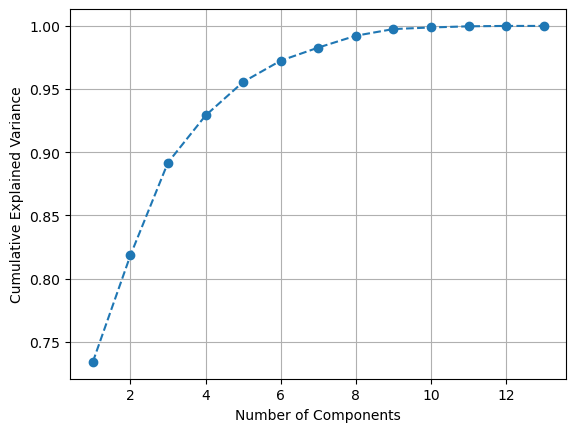

In [14]:
pca = PCA(n_components=13)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, 14), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [15]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [16]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.79537573
Iteration 2, loss = 0.53299844
Iteration 3, loss = 0.42270982
Iteration 4, loss = 0.37245949
Iteration 5, loss = 0.35149233
Iteration 6, loss = 0.33626338
Iteration 7, loss = 0.32509241
Iteration 8, loss = 0.31456449
Iteration 9, loss = 0.30816394
Iteration 10, loss = 0.29988775
Iteration 11, loss = 0.29172224
Iteration 12, loss = 0.28728071
Iteration 13, loss = 0.27796705
Iteration 14, loss = 0.26673654
Iteration 15, loss = 0.25200473
Iteration 16, loss = 0.23698751
Iteration 17, loss = 0.22042600
Iteration 18, loss = 0.19890770
Iteration 19, loss = 0.18258863
Iteration 20, loss = 0.16858976
Iteration 21, loss = 0.14490739
Iteration 22, loss = 0.13087033
Iteration 23, loss = 0.12306780
Iteration 24, loss = 0.10924598
Iteration 25, loss = 0.10851284
Iteration 26, loss = 0.09697426
Iteration 27, loss = 0.09164110
Iteration 28, loss = 0.08488157
Iteration 29, loss = 0.08173617
Iteration 30, loss = 0.08504054
Iteration 31, loss = 0.08102060
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [17]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [18]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 97.57572364369295%


In [19]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 97.60385454292373%


In [20]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 97.5825328842593%


In [21]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.9758808199675304


In [22]:
material_names = df.material.unique()

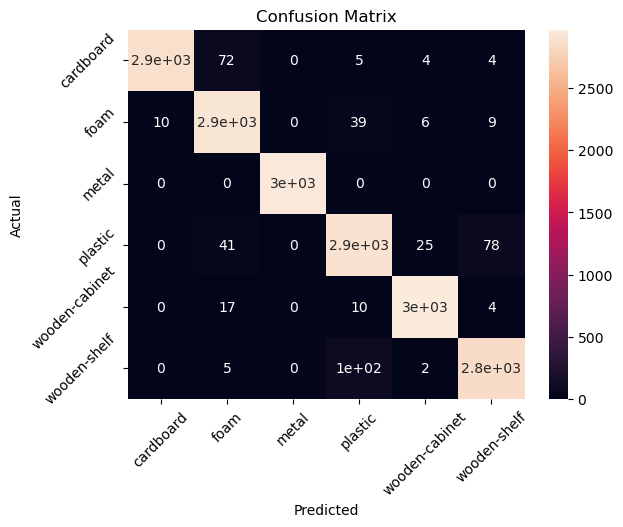

In [23]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap = sns.heatmap(cm, annot=True, xticklabels=material_names, yticklabels=material_names)

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()